# Introduction
- https://towardsdatascience.com/4-simple-ways-to-import-word-and-pdf-files-into-python-when-pandas-fails-43cf81599461
- https://github.com/YiLi225/Import_PDF_Word_Python

In [43]:
import os
import win32com
from win32com import client
import docx
import docx2pdf

In [17]:
%load_ext watermark

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark


In [18]:
%watermark -iv

docx    : 0.2.4
docx2pdf: 0.1.8



In [19]:
!pip --version

pip 24.0 from C:\Users\a126291\venv\py311pandasai\Lib\site-packages\pip (python 3.11)



# Package Exploration

In [20]:
import docx

In [21]:
# path_docx = r"C:\Users\a126291\OneDrive - AmerisourceBergen(ABC)\data\documents\docx\page-breaks.docx"
# doc = docx.Document(path_docx)
# doc_attrs = [ i for i in dir(doc) if i[0]!='_']
# print(doc_attrs)

# Read docx files using module docx

In [22]:
import glob
dir_images = r"C:\Users\a126291\OneDrive - AmerisourceBergen(ABC)\data\documents\docx\page_breaks_images"
path_images = glob.glob(dir_images + '\*.png')
path_images[0]

'C:\\Users\\a126291\\OneDrive - AmerisourceBergen(ABC)\\data\\documents\\docx\\page_breaks_images\\page_01.png'

In [23]:
from IPython.display import Image,display

# for path_image in path_images:
#     display(Image(path_image))

In [24]:
# to install: pip install python-docx
import docx # pip install python-docx
import win32com
import win32com.client

In [25]:
path_input = r"C:\Users\a126291\OneDrive - AmerisourceBergen(ABC)\data\documents\docx\page-breaks.docx"
doc = docx.Document(path_input)
lst_paras = [p.text for p in doc.paragraphs if p.text]
parsed_text = '\n'.join(lst_paras)
print(parsed_text[:100])

First page, tab here:	followed by line-break here:
here:
and here:
no-break hyphen here:-and hard pa


In [26]:
doc.sections # .section does not work here.

In [27]:
para = doc.paragraphs[0]
para

In [28]:
para_attrs = [i for i in dir(para) if i[0]!='_']
print(para_attrs)

['add_run', 'alignment', 'clear', 'contains_page_break', 'hyperlinks', 'insert_paragraph_before', 'iter_inner_content', 'paragraph_format', 'part', 'rendered_page_breaks', 'runs', 'style', 'text']


In [29]:
para.runs[0].text

'First page, tab here:'

In [30]:
print(para.text)

First page, tab here:	followed by line-break here:
here:
and here:
no-break hyphen here:-and hard page-break here>>


In [31]:
lst = para.text.split('\n')
for i,text in enumerate(lst):
    print(f"Line {i:02d}: {text}")

Line 00: First page, tab here:	followed by line-break here:
Line 01: here:
Line 02: and here:
Line 03: no-break hyphen here:-and hard page-break here>>


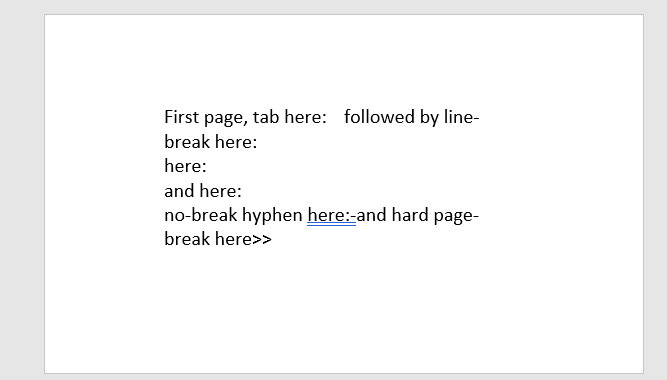

In [32]:
Image(path_images[0])

First page, tab here:	followed by line-break here:
here:
and here:
no-break hyphen here:-and hard page-break here>>


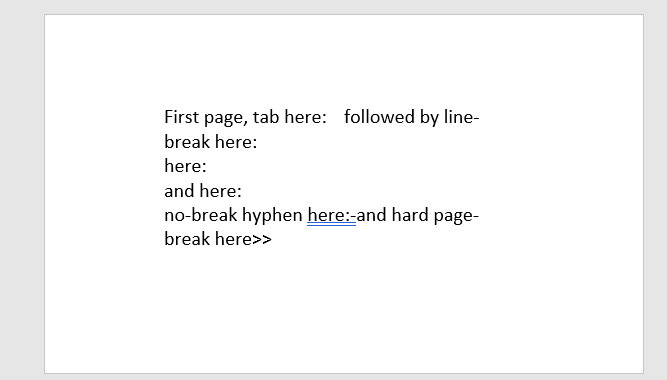

<<Text on second page. The font is big so it breaks onto third page--------------------here-->> <<but break falls inside link so text stays together.


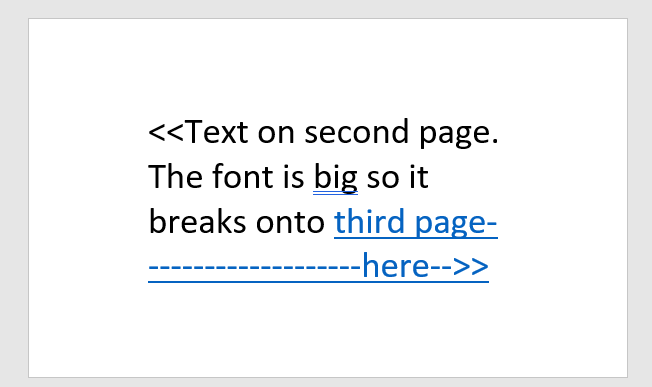

Continuous section break here>>


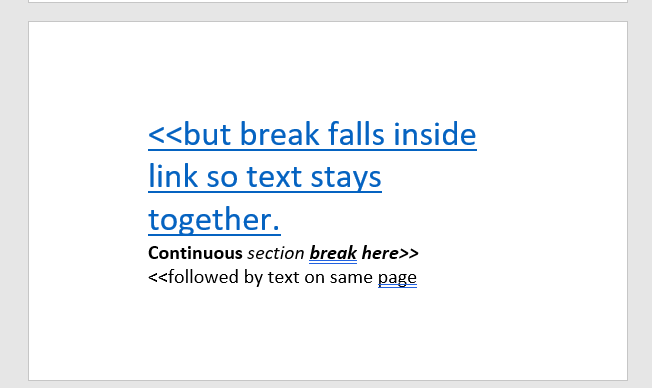

<<followed by text on same page


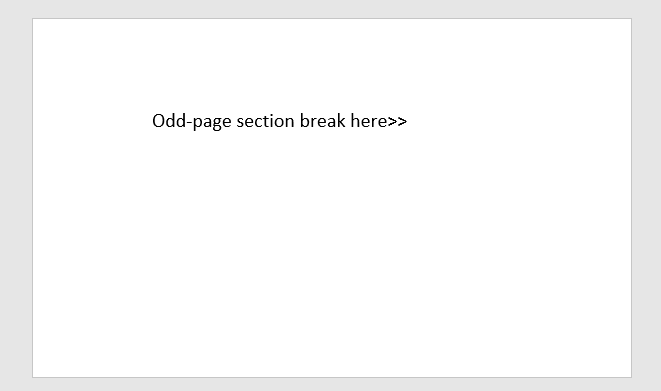

Odd-page section break here>>


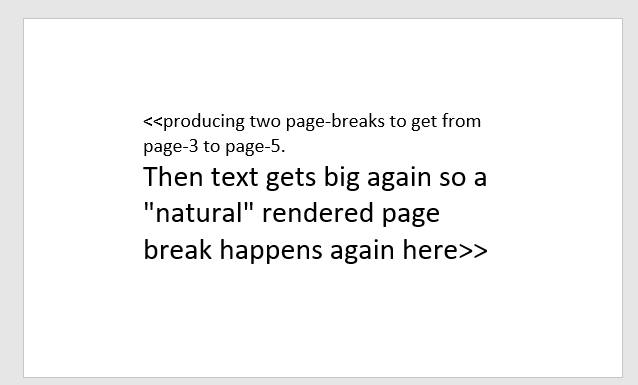

<<producing two page-breaks to get from page-3 to page-5.


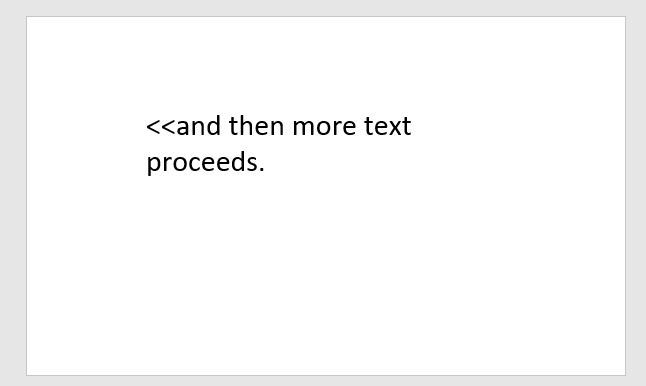

In [33]:
lst_paras = [p.text for p in doc.paragraphs if p.text]
for i in range(len(path_images)):
    print(lst_paras[i])
    display(Image(path_images[i]))
    print('='*100)

# Read docx file using win32

In [34]:
import win32com
import win32com.client

def docReader(doc_file_name):
    import win32com
    import win32com.client

    ## 1) Initiate an object that interfaces to Word
    word = win32com.client.Dispatch("Word.Application")
    word.Visible = False

    ## 2) Open the Word document to read in
    _ = word.Documents.Open(doc_file_name)

    ## 3) Extract the paragraphs and close the connections
    doc = word.ActiveDocument
    paras = doc.Range().text
    doc.Close()
    word.Quit()
    return paras

# usage
doc_out = docReader(path_input)
lst_paras = [i for i in doc_out.replace('\x07', '\r').split('\r') if i]
parsed_text = '\n'.join(lst_paras)
print(parsed_text[:100])

First page, tab here:	followed by line-break here:here:and here:
no-break hyphen here:and hard pa


# Convert docx to pdf using module docx2pdf

In [35]:
import docx2pdf

path_input = r"C:\Users\a126291\OneDrive - AmerisourceBergen(ABC)\data\documents\docx\handbook-872p.docx"
path_output = 'output.pdf'

# docx2pdf.convert(path_input) # same path
# docx2pdf.conver("path_of_docx/")

docx2pdf.convert(path_input, path_output)

  0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
# !explorer.exe .

# Read MS Word Docx table

In [ ]:
path_input = r"C:\Users\a126291\OneDrive - AmerisourceBergen(ABC)\data\documents\docx\docx-tables.docx"
doc = docx.Document(path_input)

In [ ]:
lst_paras = [p.text for p in doc.paragraphs if p.text]
parsed_text = '\n'.join(lst_paras)
print(parsed_text)

In [38]:
extracted_tables = []

for table in doc.tables:
    table_content = []
    for row in table.rows:
        row_content = []
        for cell in row.cells:
            row_content.append(cell.text)
        table_content.append(row_content)
    extracted_tables.append(table_content)

print(extracted_tables)

[[['Header Col 1', 'Header Col 2'], ['Lorem ipsum', 'A link example']], [['a', '>b<', 'c'], ['d', '', 'i'], ['j', 'k', 'l']], [['a', 'b', 'b'], ['a', 'c', 'd'], ['e', 'e', 'd']]]


# Function to read text from docx

In [39]:
path_docx = path_input
path_docx

'C:\\Users\\a126291\\OneDrive - AmerisourceBergen(ABC)\\data\\documents\\docx\\docx-tables.docx'

In [47]:
def get_lst_text_from_paragraph_text_not_tables_from_docx(path_docx):
    r"""Get list of text from paragraphs of docx document

# Usage:
========
path_docx = r"C:\Users\a126291\OneDrive - AmerisourceBergen(ABC)\data\documents\docx\page-breaks.docx"
lst_text =get_lst_text_from_paragraph_text_not_tables_from_docx(path_docx)
parsed_text = '\n'.join(lst_text)
print(parsed_text)
    """
    import docx

    doc = docx.Document(path_docx)
    lst_paras_text = [p.text for p in doc.paragraphs if p.text]

    return lst_paras_text

In [48]:
path_docx = r"C:\Users\a126291\OneDrive - AmerisourceBergen(ABC)\data\documents\docx\page-breaks.docx"
lst_text = get_lst_text_from_paragraph_text_not_tables_from_docx(path_docx)
parsed_text = '\n'.join(lst_text)
print(parsed_text)

First page, tab here:	followed by line-break here:
here:
and here:
no-break hyphen here:-and hard page-break here>>
<<Text on second page. The font is big so it breaks onto third page--------------------here-->> <<but break falls inside link so text stays together.
Continuous section break here>>
<<followed by text on same page
Odd-page section break here>>
<<producing two page-breaks to get from page-3 to page-5.
Then text gets big again so a "natural" rendered page break happens again here>> <<and then more text proceeds.
